# Primary Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
file = './data/raw_data.csv'
df = pd.read_csv(file)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Plotting Default

In [4]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10); # Only default settings - no graph yet!

<Figure size 864x360 with 0 Axes>

## Numerical Data

### Monthly Charges

In [5]:
df['MonthlyCharges'].head(3)

0    29.85
1    56.95
2    53.85
Name: MonthlyCharges, dtype: float64

In [6]:
df['MonthlyCharges'].apply(type).value_counts()

<class 'float'>    7043
Name: MonthlyCharges, dtype: int64

In [7]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

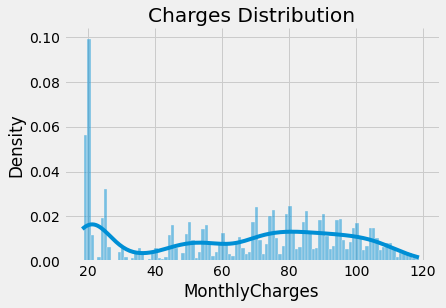

In [8]:
def plot_dist(series=df['MonthlyCharges'], title='Charges Distribution'):
    sns.histplot(series, kde=True, stat='density', discrete=True)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

In [9]:
# We can also visualise binned fare_amount variable
df['charge_bin'] = pd.cut(df['MonthlyCharges'], bins = list(range(0, 120, 10)), include_lowest=True).astype('str')

# Sort by fare the correct look in the chart
df = df.sort_values(by='MonthlyCharges')

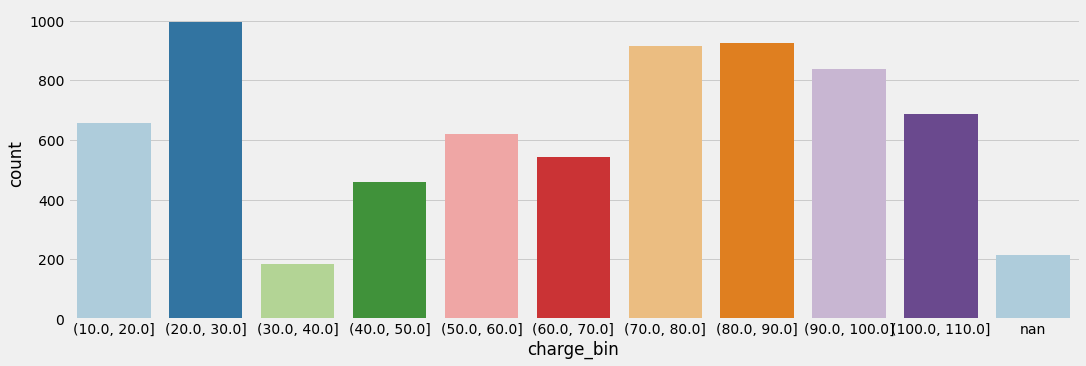

In [10]:
sns.catplot(x='charge_bin', kind='count', palette=palette, data=df, height=5, aspect=3);
sns.despine();

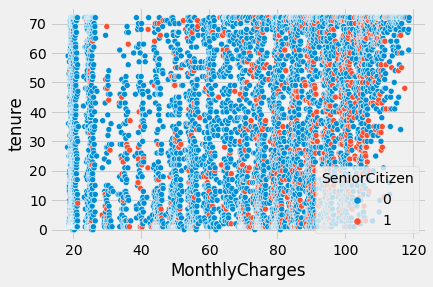

In [11]:
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='SeniorCitizen', data=df);

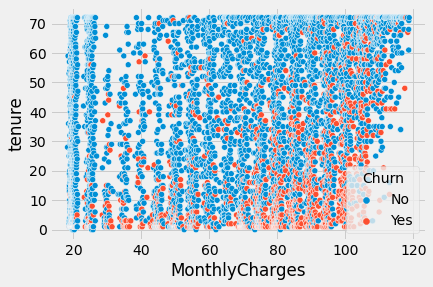

In [12]:
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df);

### Total Charges

In [13]:
df['TotalCharges'].head(3)

3719      534.7
1529    1057.85
6652        689
Name: TotalCharges, dtype: object

In [14]:
df['TotalCharges'].apply(type).value_counts()

<class 'str'>    7043
Name: TotalCharges, dtype: int64

In [15]:
df.loc[df['TotalCharges'] == ' ', ['TotalCharges']]

,TotalCharges
5218,
3331,
4380,
753,
3826,
1082,
488,
1340,
6754,
6670,


In [16]:
df['TotalCharges'].replace({' ':'0'}, inplace=True)

In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float32)

In [18]:
df['TotalCharges'].apply(type).value_counts()

<class 'float'>    7043
Name: TotalCharges, dtype: int64

## Categorical Data

### Customer ID

In [19]:
df['customerID'].head(3)

3719    6823-SIDFQ
1529    9764-REAFF
6652    0827-ITJPH
Name: customerID, dtype: object

In [20]:
df['customerID'].nunique()

7043

In [21]:
df['customerID'].apply(type).value_counts()

<class 'str'>    7043
Name: customerID, dtype: int64

### Gender

In [22]:
df['gender'].head(3)

3719      Male
1529    Female
6652      Male
Name: gender, dtype: object

In [23]:
df['gender'].nunique()

2

In [24]:
df['gender'].apply(type).value_counts()

<class 'str'>    7043
Name: gender, dtype: int64

### Senior Citizen

In [25]:
df['SeniorCitizen'].head(3)

3719    0
1529    0
6652    0
Name: SeniorCitizen, dtype: int64

In [26]:
df['SeniorCitizen'].nunique()

2

In [27]:
df['SeniorCitizen'].apply(type).value_counts()

<class 'int'>    7043
Name: SeniorCitizen, dtype: int64

### Dependents

In [28]:
df['Dependents'].apply(type).value_counts()

<class 'str'>    7043
Name: Dependents, dtype: int64

### Partner

In [29]:
df['Partner'].apply(type).value_counts()

<class 'str'>    7043
Name: Partner, dtype: int64

## Overview

- **customerID**: 7043 unique string values (cat)
- **gender**: String values with either male or female (OHE with drop:'if_binary') (cat)
- **SeniorCitizen**: Int values with either senior (1) or not (0) (cat)
- **MonthlyCharges**: Float with monthly contract charge
- **TotalCharges**: String to be converted to float with total charge

In [30]:
unique_number = pd.DataFrame(df.drop(columns=['customerID',
                                              'MonthlyCharges',
                                              'TotalCharges',
                                              'tenure',
                                              'charge_bin']).nunique())

In [31]:
unique_number.reset_index(inplace=True)

In [32]:
unique_number.head()

,index,0
0,gender,2
1,SeniorCitizen,2
2,Partner,2
3,Dependents,2
4,PhoneService,2


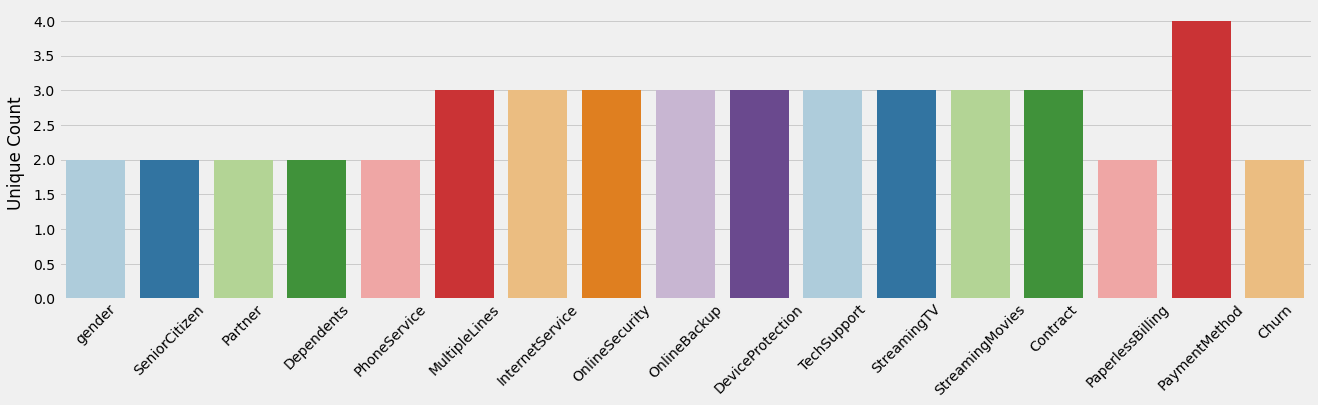

In [33]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='index', y=0, palette=palette, data=unique_number, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Unique Count', labelpad=8)
plt.xticks(rotation=45);